9.1 A Brief matplotlib API Primer

[0 1 2 3 4 5 6 7 8 9]


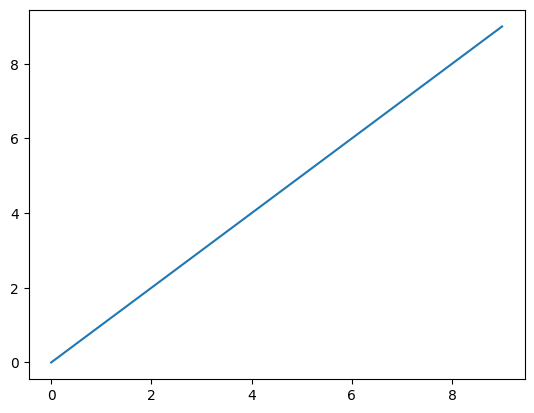

In [6]:
import matplotlib.pyplot as plt
import numpy as np


data = np.arange(10)
print(data)
plt.plot(data)

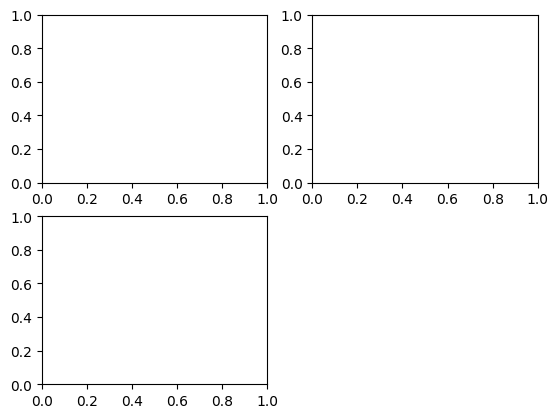

In [7]:
# Figures and Subplots

fig = plt.figure()
ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)

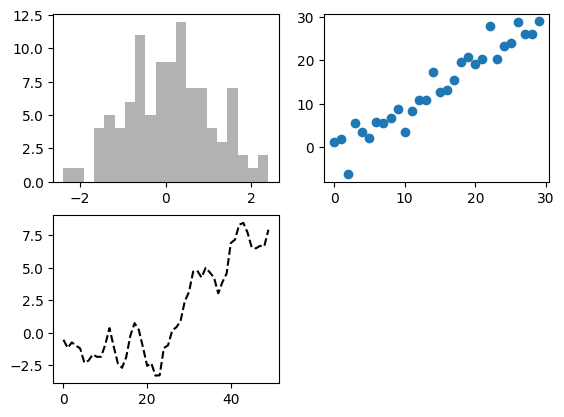

In [11]:
fig = plt.figure()
ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)
plt.plot(np.random.randn(50).cumsum(), 'k--')
_ = ax1.hist(np.random.randn(100), bins=20, color='k', alpha=0.3)
ax2.scatter(np.arange(30), np.arange(30) + 3 * np.random.randn(30))

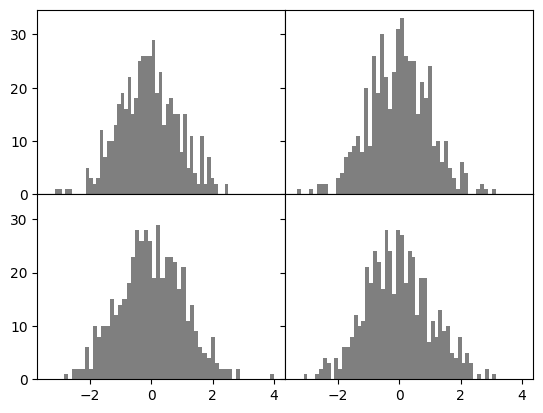

In [13]:
fig, axes = plt.subplots(2, 2, sharex=True, sharey=True)
for i in range(2):
    for j in range(2):
        axes[i, j].hist(np.random.randn(500), bins=50, color='k', alpha=0.5)
plt.subplots_adjust(wspace=0, hspace=0)

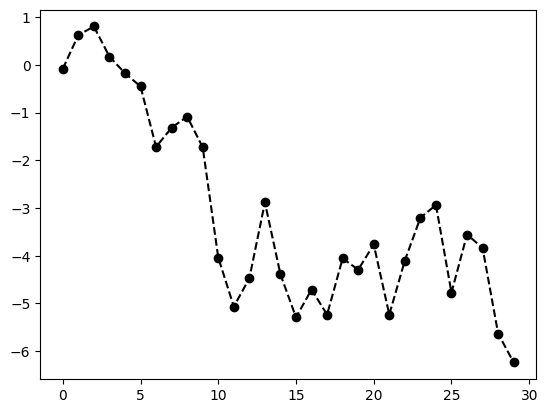

In [16]:
# Colors, Markers, and Line Styles

from numpy.random import randn


plt.plot(randn(30).cumsum(), 'ko--')

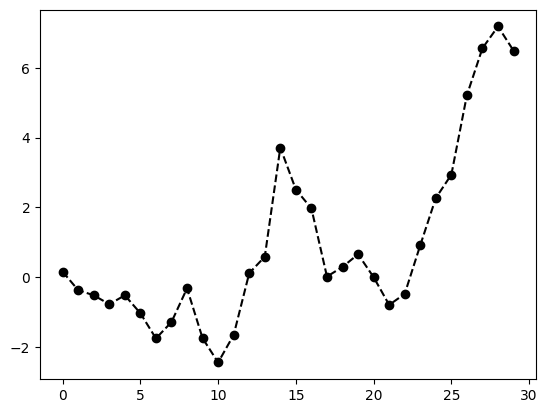

In [17]:
plt.plot(randn(30).cumsum(), color='k', linestyle='dashed', marker='o')

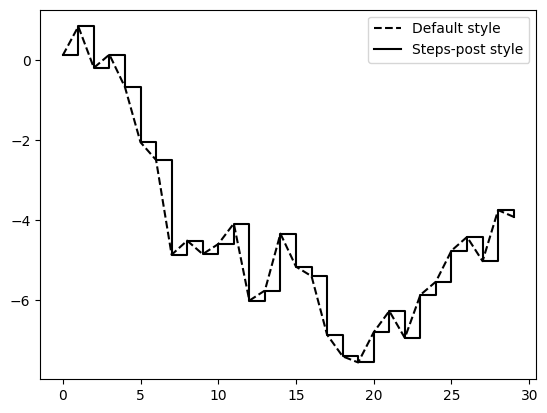

In [22]:
data = np.random.randn(30).cumsum()
plt.plot(data, 'k--', label='Default style')
plt.plot(data, 'k-', drawstyle='steps-post', label='Steps-post style')
plt.legend(loc='best')

[Text(0.5, 1.0, 'My first plot'), Text(0.5, 0, 'Phases')]

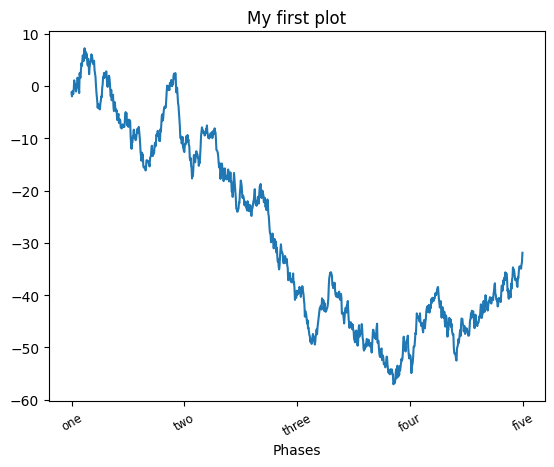

In [32]:
# Ticks, Labels, and Legends


fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.plot(np.random.randn(1000).cumsum())
ticks = ax.set_xticks([0, 250, 500, 750, 1000])
labels = ax.set_xticklabels(['one', 'two', 'three', 'four', 'five'],
                            rotation=30, fontsize='small')
ax.set_title('My first plot')
ax.set_xlabel('Phases')

props = {'title': 'My first plot',
         'xlabel': 'Phases'}
ax.set(**props)



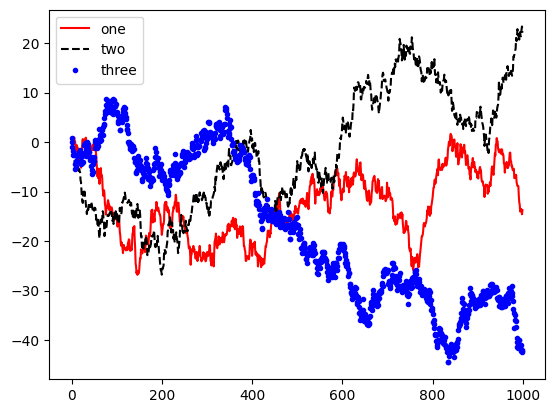

In [42]:
from numpy.random import randn


fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.plot(randn(1000).cumsum(), 'r', label='one')
ax.plot(randn(1000).cumsum(), 'k--', label='two')
ax.plot(randn(1000).cumsum(), 'b.', label='three')
ax.legend(loc='best')

Text(0.5, 1.0, 'Important events of the financial crisis of 2008-2009')

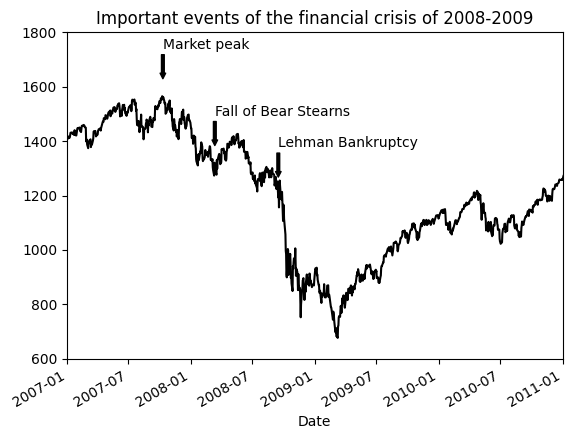

In [10]:
# Annotations and Drawing on a Subplot

from datetime import datetime
import pandas as pd
import matplotlib.pyplot as plt


fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
data = pd.read_csv('examples/spx.csv', index_col=0, parse_dates=True)
spx = data['SPX']

spx.plot(ax=ax, style='k-')

crisis_data = {
    (datetime(2007, 10, 11), 'Market peak'),
    (datetime(2008, 3, 12),'Fall of Bear Stearns'),
    (datetime(2008, 9, 15), 'Lehman Bankruptcy')
}

for date, label in crisis_data:
    ax.annotate(label, xy=(date, spx.asof(date) + 75),
                xytext=(date, spx.asof(date)+ 225),
                arrowprops=dict(facecolor='black', headwidth=4, width=2, headlength=4),
                horizontalalignment='left', verticalalignment='top')
    
ax.set_xlim(['1/1/2007', '1/1/2011'])
ax.set_ylim(600, 1800)
ax.set_title('Important events of the financial crisis of 2008-2009')

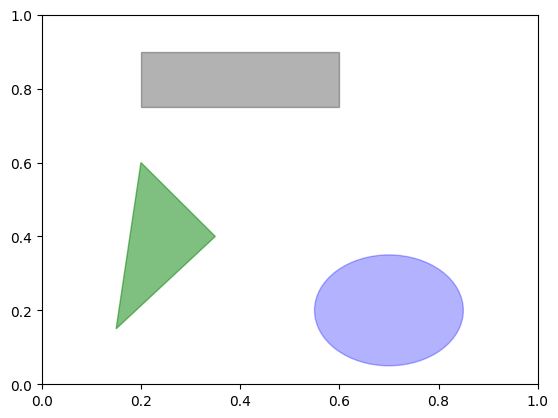

In [11]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

rect = plt.Rectangle((0.2, 0.75), 0.4, 0.15, color='k', alpha=0.3)
circ = plt.Circle((0.7, 0.2), 0.15, color='b', alpha=0.3)
pgon = plt.Polygon([[0.15, 0.15], [0.35, 0.4], [0.2, 0.6]],
                   color='g', alpha=0.5)

ax.add_patch(rect)
ax.add_patch(circ)
ax.add_patch(pgon)

In [12]:
# Saving Plots to File

from io import BytesIO


buffer = BytesIO()
plt.savefig(buffer)
plot_data = buffer.getvalue()

<Figure size 640x480 with 0 Axes>

9.2 Plotting with pandas and seaborn

<Axes: >

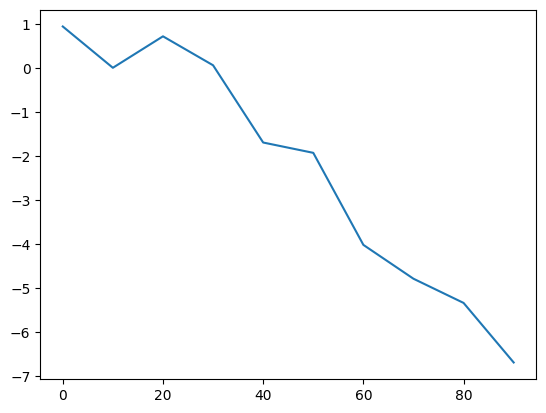

In [3]:
# Line Plots

import pandas as pd
import numpy as np


s = pd.Series(np.random.randn(10).cumsum(), index=np.arange(0, 100, 10))
s.plot()

<Axes: >

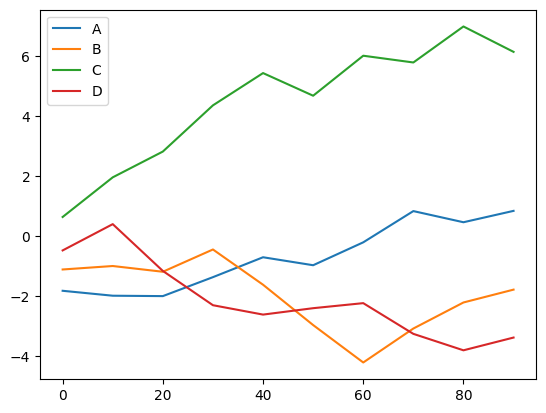

In [4]:
df = pd.DataFrame(np.random.randn(10, 4).cumsum(0),
                  columns=['A', 'B', 'C', 'D'],
                  index=np.arange(0, 100, 10))
df.plot()

<Axes: >

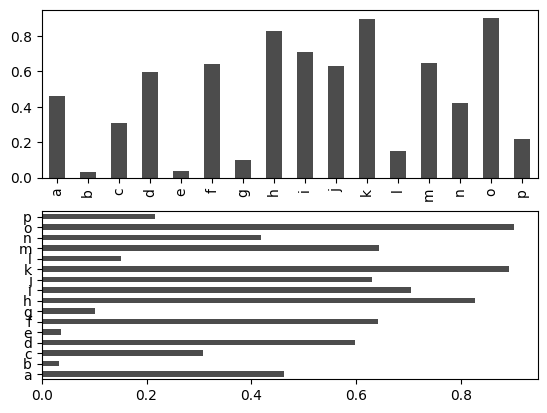

In [7]:
# Bar Plots

import matplotlib.pyplot as plt

fig, axes = plt.subplots(2, 1)
data = pd.Series(np.random.rand(16), index=list('abcdefghijklmnop'))
data.plot.bar(ax=axes[0], color='k', alpha=0.7)
data.plot.barh(ax=axes[1], color='k', alpha=0.7)

<Axes: >

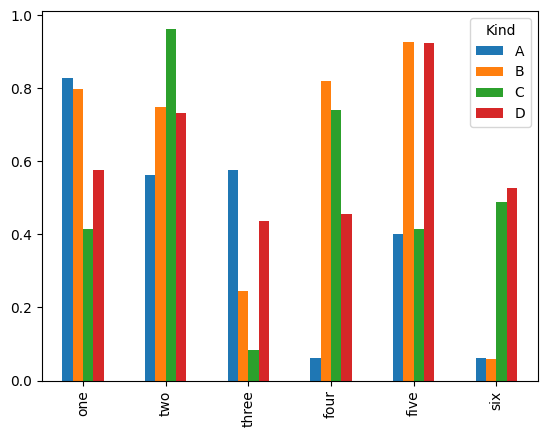

In [13]:
df = pd.DataFrame(np.random.rand(6, 4),
                  index=['one', 'two', 'three', 'four', 'five', 'six'],
                  columns=pd.Index(['A', 'B', 'C', 'D'], name='Kind'))
df
df.plot.bar()

<Axes: >

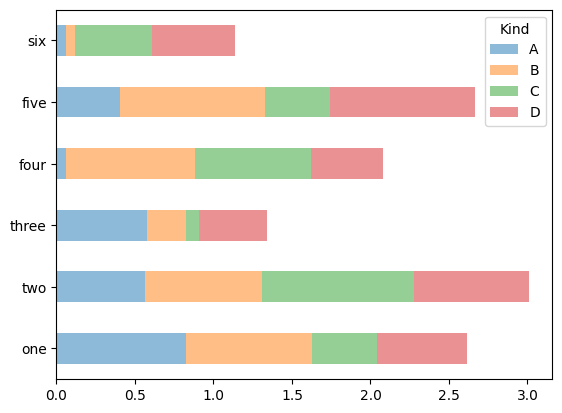

In [15]:
df.plot.barh(stacked=True, alpha=0.5)

<Axes: xlabel='dzień'>

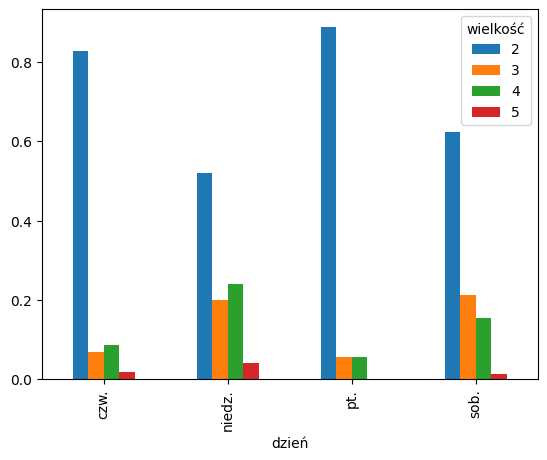

In [24]:
tips = pd.read_csv('examples/napiwki.csv')
party_counts = pd.crosstab(tips['dzień'], tips['wielkość'])
party_counts
party_counts = party_counts.loc[:, 2:5]
party_pcts = party_counts.div(party_counts.sum(1), axis=0)
party_pcts
party_pcts.plot.bar()

<Axes: xlabel='tip_pct', ylabel='dzień'>

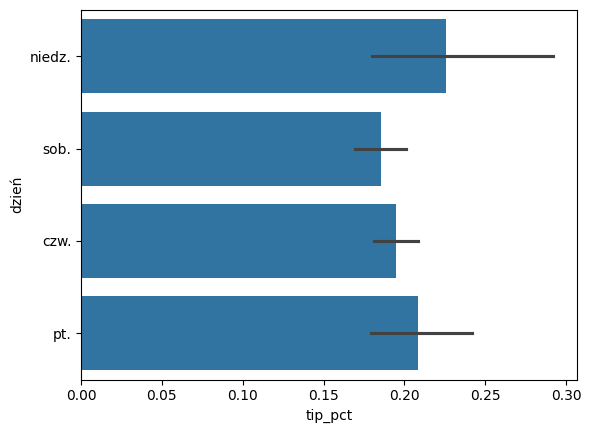

In [28]:
import seaborn as sns


tips['tip_pct'] = tips['napiwek'] / (tips['rachunek'] - tips['napiwek'])
tips.head()
sns.barplot(x='tip_pct', y='dzień', data=tips, orient='h')



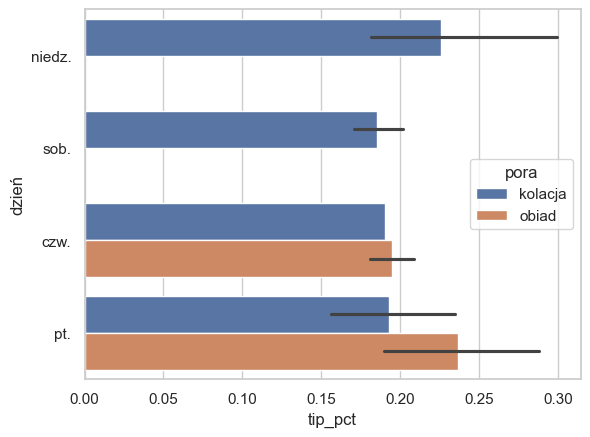

In [35]:
sns.barplot(x='tip_pct', y='dzień', hue='pora', data=tips, orient='h')
sns.set_theme(style='whitegrid')

<Axes: ylabel='Frequency'>

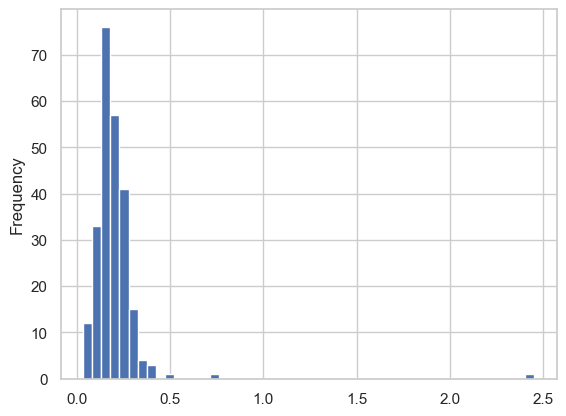

In [36]:
# Histograms and Density Plots

tips['tip_pct'].plot.hist(bins=50)

<Axes: ylabel='Density'>

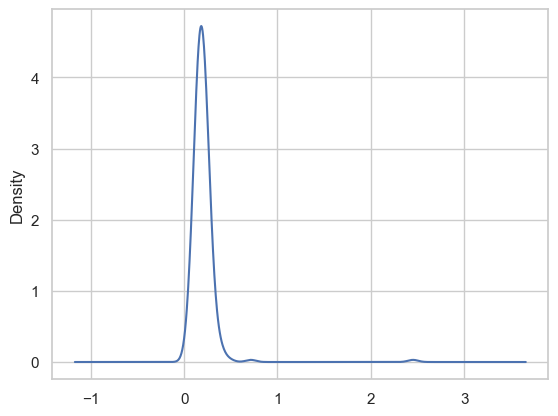

In [38]:
tips['tip_pct'].plot.density()

/Users/metju29/CursorProjects/data-learning/.venv/lib/python3.13/site-packages/seaborn/external/kde.py:248: RuntimeWarning: divide by zero encountered in dot
  scaled_dataset = dot(whitening, self.dataset)
/Users/metju29/CursorProjects/data-learning/.venv/lib/python3.13/site-packages/seaborn/external/kde.py:248: RuntimeWarning: overflow encountered in dot
  scaled_dataset = dot(whitening, self.dataset)
/Users/metju29/CursorProjects/data-learning/.venv/lib/python3.13/site-packages/seaborn/external/kde.py:248: RuntimeWarning: invalid value encountered in dot
  scaled_dataset = dot(whitening, self.dataset)


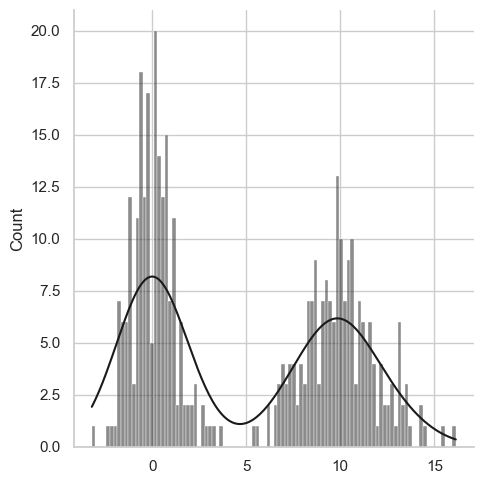

In [40]:
comp1 = np.random.normal(0, 1, size=200)
comp2 = np.random.normal(10, 2, size=200)
values = pd.Series(np.concatenate([comp1, comp2]))
sns.displot(values, bins=100, color='k', kde=True)

/Users/metju29/CursorProjects/data-learning/.venv/lib/python3.13/site-packages/seaborn/regression.py:255: RuntimeWarning: divide by zero encountered in dot
  yhat_boots = grid.dot(beta_boots).T
/Users/metju29/CursorProjects/data-learning/.venv/lib/python3.13/site-packages/seaborn/regression.py:255: RuntimeWarning: overflow encountered in dot
  yhat_boots = grid.dot(beta_boots).T
/Users/metju29/CursorProjects/data-learning/.venv/lib/python3.13/site-packages/seaborn/regression.py:255: RuntimeWarning: invalid value encountered in dot
  yhat_boots = grid.dot(beta_boots).T


Text(0.5, 1.0, 'Changes in the value of logarithm m1 compared to logarithm unemp')

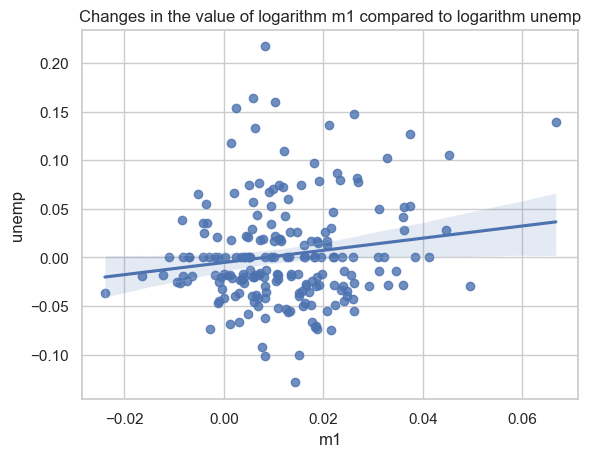

In [48]:
# Scatter or Point Plots

macro = pd.read_csv('examples/macrodata.csv')
data = macro[['cpi', 'm1', 'tbilrate', 'unemp']]
trans_data = np.log(data).diff().dropna()
trans_data[-5:]
sns.regplot(x='m1', y='unemp', data=trans_data)
plt.title('Changes in the value of logarithm %s compared to logarithm %s' % ('m1', 'unemp'))

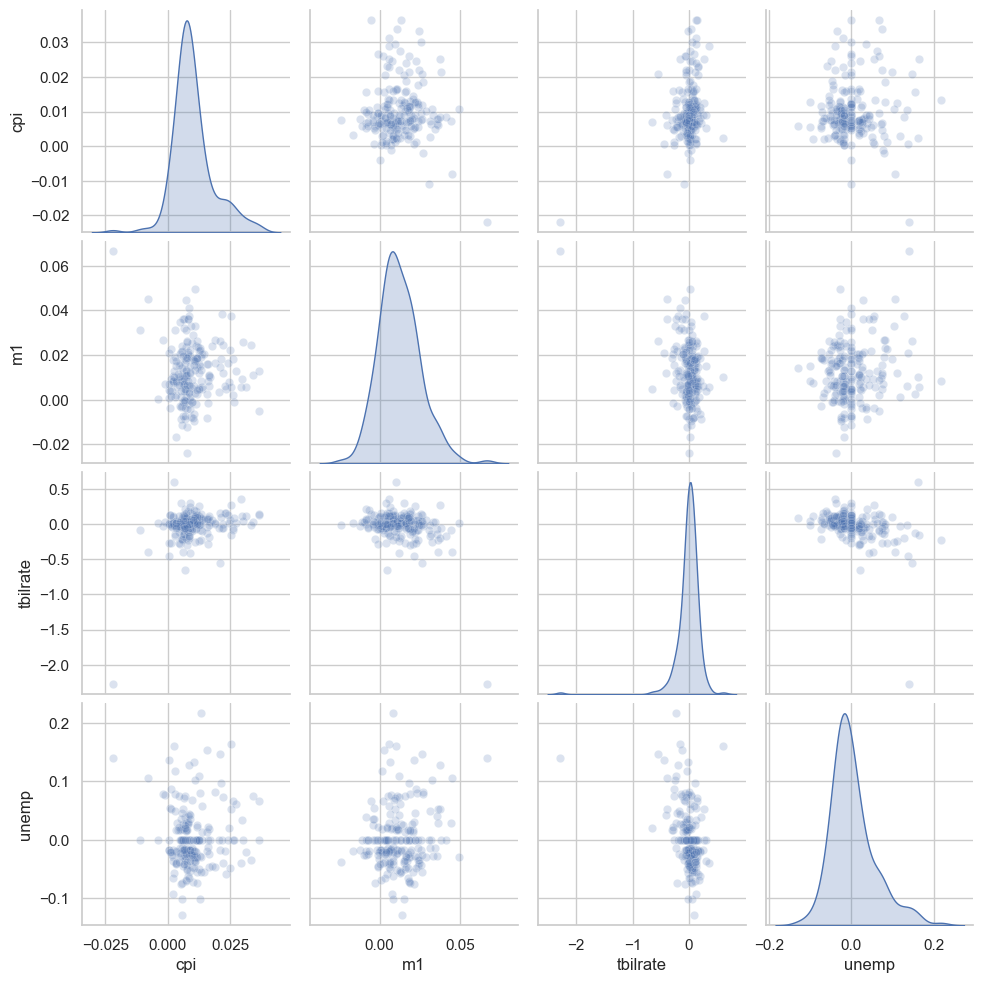

In [49]:
sns.pairplot(trans_data, diag_kind='kde', plot_kws={'alpha': 0.2})

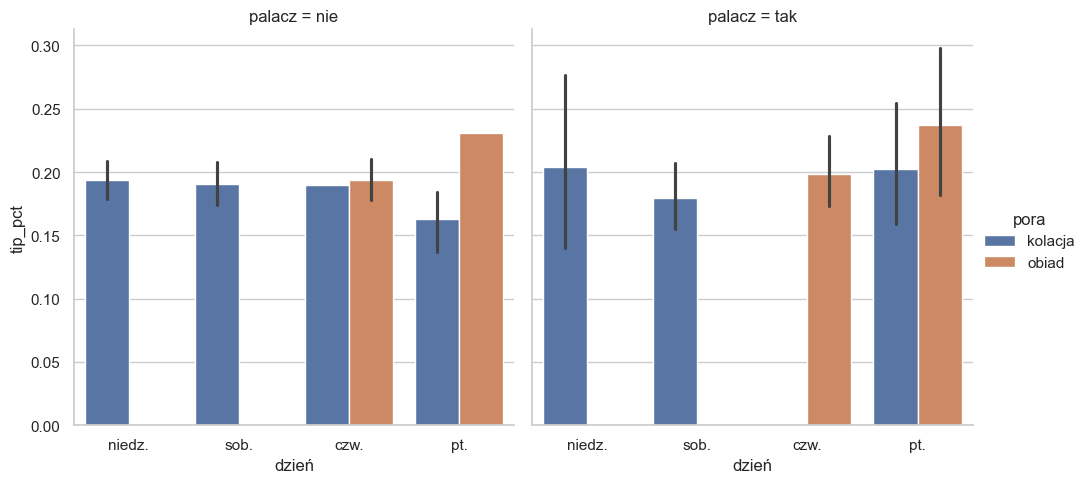

In [53]:
# Facet Grids and Categorical Data

sns.catplot(x='dzień', y='tip_pct', hue='pora', col='palacz', kind='bar', data=tips[tips.tip_pct < 1])


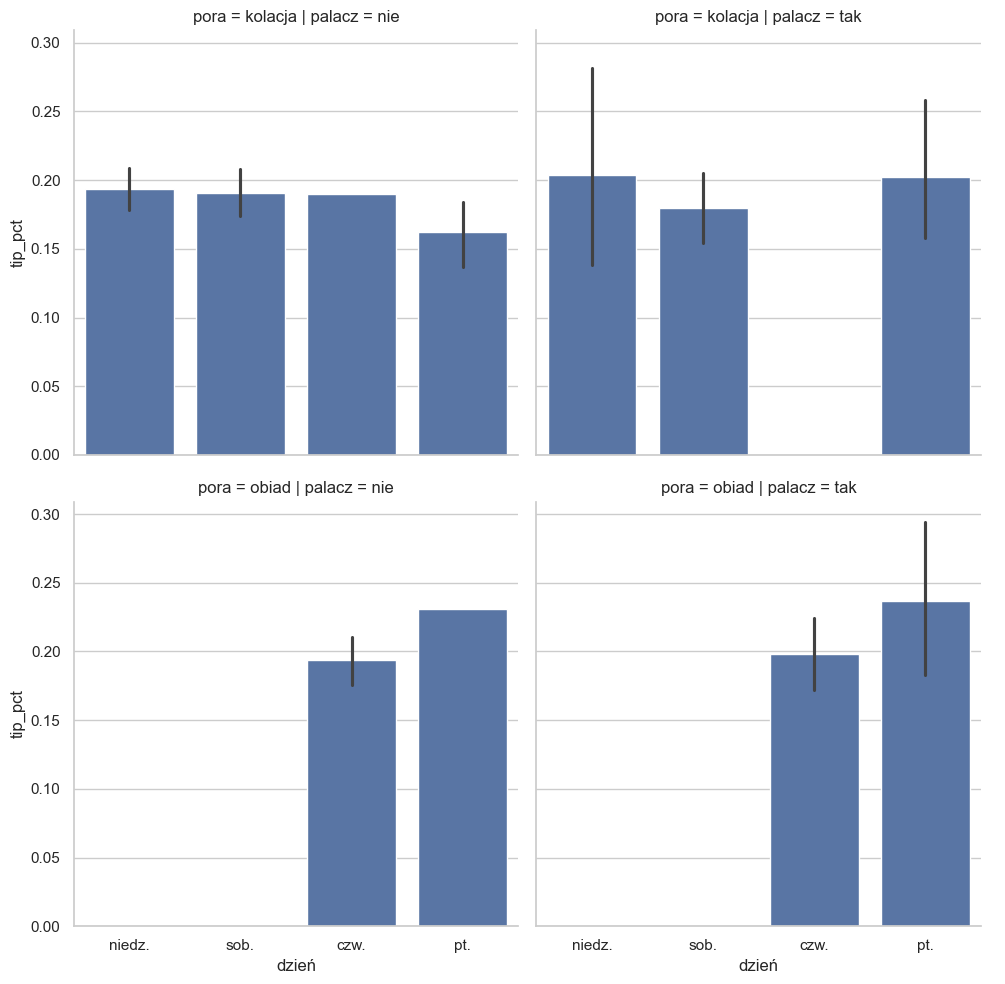

In [55]:
sns.catplot(x='dzień', y='tip_pct', row='pora', col='palacz', kind='bar', data=tips[tips.tip_pct < 1])

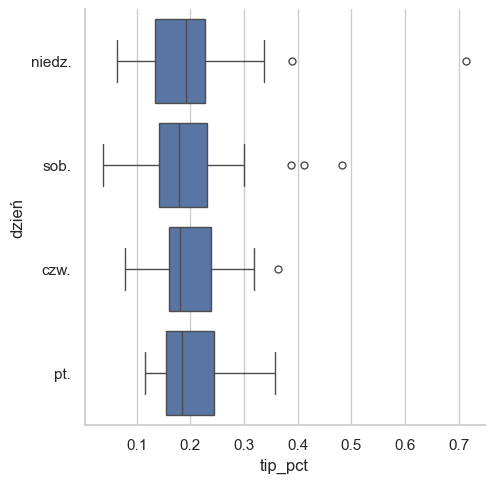

In [56]:
sns.catplot(x='tip_pct', y='dzień', kind='box', data=tips[tips.tip_pct < 1])